In [137]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, levene, f_oneway, mannwhitneyu
print('Setup complete!')

Setup complete!


In [2]:
data = pd.read_csv('data/online_learning_course_consumption_dataset.csv')
data.head()

,User_ID,Experience_Level,Course_Type,Platform,Hours_Spent_Per_Week,Course_Duration_Weeks,Completion_Status,Completion_Percentage,Dropout_Reason,Satisfaction_Score
0,U0001,Fresher,Tech,Skillshare,16,8,Completed,67,No Dropout,2
1,U0002,Fresher,Non-Tech,edX,17,22,Dropped,38,Time Constraint,3
2,U0003,Fresher,Non-Tech,Coursera,19,21,In Progress,43,No Dropout,1
3,U0004,Student,Non-Tech,Udemy,14,2,Dropped,14,Time Constraint,1
4,U0005,Student,Non-Tech,Skillshare,8,10,Dropped,8,Too Difficult,4


Подготовка данных

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   User_ID                500 non-null    object
 1   Experience_Level       500 non-null    object
 2   Course_Type            500 non-null    object
 3   Platform               500 non-null    object
 4   Hours_Spent_Per_Week   500 non-null    int64 
 5   Course_Duration_Weeks  500 non-null    int64 
 6   Completion_Status      500 non-null    object
 7   Completion_Percentage  500 non-null    int64 
 8   Dropout_Reason         500 non-null    object
 9   Satisfaction_Score     500 non-null    int64 
dtypes: int64(4), object(6)
memory usage: 39.2+ KB


In [8]:
data.apply(lambda x: x.unique())

User_ID                  [U0001, U0002, U0003, U0004, U0005, U0006, U00...
Experience_Level                  [Fresher, Student, Working Professional]
Course_Type                                               [Tech, Non-Tech]
Platform                       [Skillshare, edX, Coursera, Udemy, YouTube]
Hours_Spent_Per_Week     [16, 17, 19, 14, 8, 11, 12, 1, 5, 13, 6, 2, 20...
Course_Duration_Weeks    [8, 22, 21, 2, 10, 11, 19, 17, 14, 15, 20, 3, ...
Completion_Status                        [Completed, Dropped, In Progress]
Completion_Percentage    [67, 38, 43, 14, 8, 53, 34, 37, 51, 98, 71, 27...
Dropout_Reason           [No Dropout, Time Constraint, Too Difficult, L...
Satisfaction_Score                                         [2, 3, 1, 4, 5]
dtype: object

In [9]:
data.Dropout_Reason.unique()

array(['No Dropout', 'Time Constraint', 'Too Difficult', 'Lost Interest'],
      dtype=object)

In [15]:
data.isnull().sum().sum().item()

0

In [19]:
data.duplicated().sum().item()

0

EDA

In [20]:
data.describe()

,Hours_Spent_Per_Week,Course_Duration_Weeks,Completion_Percentage,Satisfaction_Score
count,500.000000,500.000000,500.000000,500.000000
mean,10.560000,13.256000,50.480000,3.022000
std,5.520085,6.506853,26.973259,1.434445
min,1.000000,2.000000,5.000000,1.000000
25%,6.000000,8.000000,30.750000,2.000000
50%,11.000000,13.500000,46.000000,3.000000
75%,15.000000,19.000000,73.000000,4.000000
max,20.000000,24.000000,100.000000,5.000000


<Axes: xlabel='Course_Duration_Weeks'>

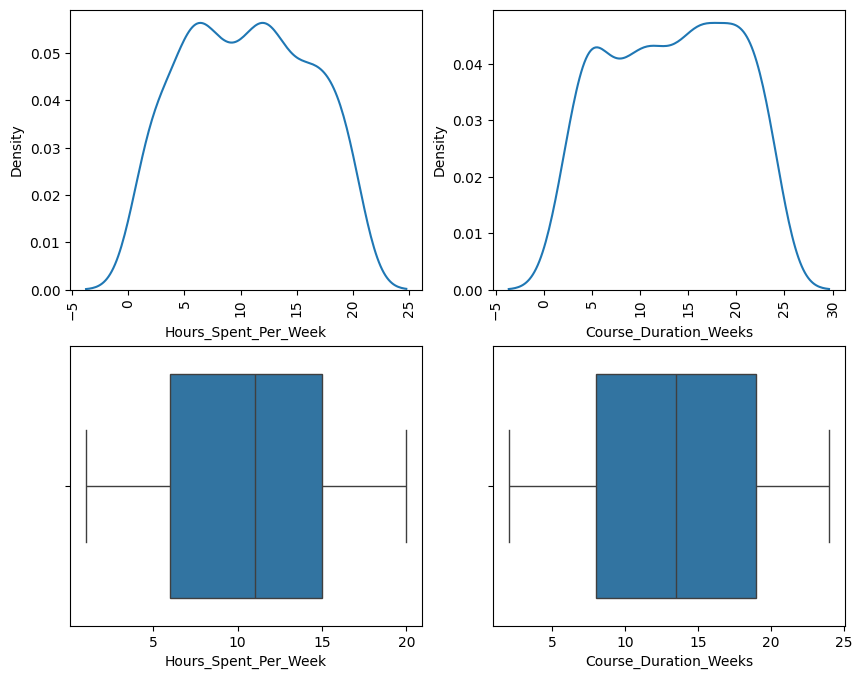

In [64]:
plt.figure(figsize=(10,8))

plt.subplot(2, 2, 1)
sns.kdeplot(data=data, x='Hours_Spent_Per_Week')
plt.xticks(rotation=90) 

plt.subplot(2, 2, 2)
sns.kdeplot(data=data, x='Course_Duration_Weeks')
plt.xticks(rotation=90)  

plt.subplot(2, 2, 3)
sns.boxplot(data=data, x='Hours_Spent_Per_Week')  

plt.subplot(2, 2, 4)
sns.boxplot(data=data, x='Course_Duration_Weeks') 

гипотеза 1

Course_Type
Non-Tech    256
Tech        244
Name: count, dtype: int64

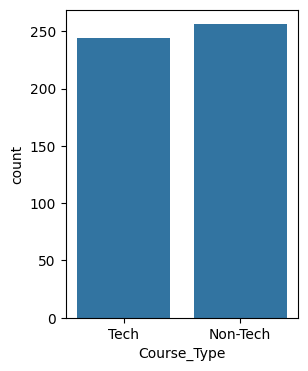

In [81]:
plt.figure(figsize=(3,4))
sns.countplot(data=data, x='Course_Type')

data['Course_Type'].value_counts()

гипотеза 2

Experience_Level      Completion_Status
Fresher               Dropped              0.362573
                      In Progress          0.356725
                      Completed            0.280702
Student               Completed            0.365385
                      Dropped              0.352564
                      In Progress          0.282051
Working Professional  In Progress          0.381503
                      Dropped              0.323699
                      Completed            0.294798
dtype: float64

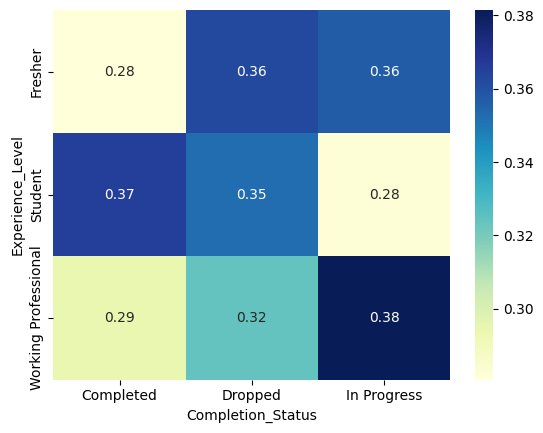

In [93]:
table = pd.crosstab(data['Experience_Level'], data['Completion_Status'], normalize='index')
sns.heatmap(table, annot=True, fmt=".2f", cmap='YlGnBu')

data.groupby('Experience_Level').Completion_Status.value_counts() / data.groupby('Experience_Level').Completion_Status.count()

гипотеза 3

Dropout_Reason
No Dropout         371
Time Constraint     47
Too Difficult       47
Lost Interest       35
Name: count, dtype: int64

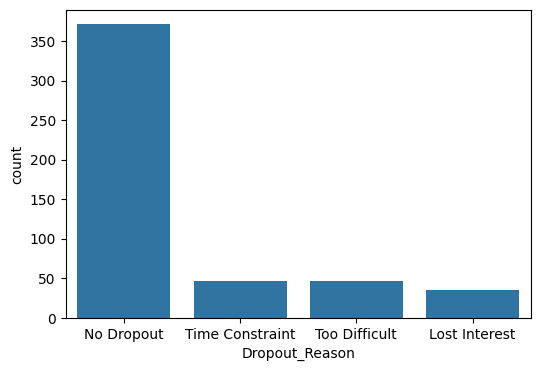

In [105]:
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='Dropout_Reason')

data.Dropout_Reason.value_counts()

гипотеза 4

In [108]:
group1 = data[data['Completion_Status'] == 'Completed']['Hours_Spent_Per_Week']
group2 = data[data['Completion_Status'] == 'Dropped']['Hours_Spent_Per_Week']

t_stat, p_value = ttest_ind(group1, group2, equal_var=False)  
print("t-statistic:", t_stat)
print("p-value:", p_value)

alpha = 0.05  # уровень значимости 5%

if p_value < alpha:
    print("Отвергаем H0: средние различаются")
else:
    print("Не отвергаем H0: статистически значимой разницы нет")

t-statistic: 1.0492952793324934
p-value: 0.2948257845932791
Не отвергаем H0: статистически значимой разницы нет


гипотеза 5

In [114]:
num_col = 'Hours_Spent_Per_Week'
cat_col = 'Experience_Level'
groups = [data[data[cat_col]==level][num_col] for level in data[cat_col].unique()]
stat, p = levene(*groups)
print("Levene test p-value:", p)

if p < 0.05:
    print("Дисперсии различаются")
else:
    print("Дисперсии примерно равны")

Levene test p-value: 0.2846377585438169
Дисперсии примерно равны


In [128]:
groups = [data[data['Experience_Level']==level]['Hours_Spent_Per_Week'] for level in data['Experience_Level'].unique()]

f_stat, p_value = f_oneway(*groups)
print("F-statistic:", f_stat)
print("p-value:", p_value)

alpha = 0.05  # уровень значимости 5%

if p_value < alpha:
    print("Отвергаем H0: средние различаются")
else:
    print("Не отвергаем H0: статистически значимой разницы нет")

F-statistic: 1.1119193508173857
p-value: 0.3297438653492071
Не отвергаем H0: статистически значимой разницы нет


гипотеза 6

In [123]:
print(data.groupby('Experience_Level').Hours_Spent_Per_Week.sum())
print('Студенты:', data.groupby('Experience_Level').Hours_Spent_Per_Week.sum()[:2].sum().item())

Experience_Level
Fresher                 1779
Student                 1731
Working Professional    1770
Name: Hours_Spent_Per_Week, dtype: int64
Студенты: 3510


гипотезы 7, 8

In [124]:
group1 = data[data['Completion_Status'] == 'Completed']['Course_Duration_Weeks']
group2 = data[data['Completion_Status'] == 'Dropped']['Course_Duration_Weeks']

t_stat, p_value = ttest_ind(group1, group2, equal_var=False)  
print("t-statistic:", t_stat)
print("p-value:", p_value)

alpha = 0.05  # уровень значимости 5%

if p_value < alpha:
    print("Отвергаем H0: средние различаются")
else:
    print("Не отвергаем H0: статистически значимой разницы нет")

t-statistic: -0.21061720073066195
p-value: 0.8333179627341901
Не отвергаем H0: статистически значимой разницы нет


гипотеза 9

In [127]:
groups = [data[data['Platform']==p]['Satisfaction_Score'] for p in data['Platform'].unique()]
f_stat, p_value = f_oneway(*groups)
print("F-statistic:", f_stat)
print("p-value:", p_value)

alpha = 0.05  # уровень значимости 5%

if p_value < alpha:
    print("Отвергаем H0: средние различаются")
else:
    print("Не отвергаем H0: статистически значимой разницы нет")

F-statistic: 1.1207371616142137
p-value: 0.3459079171751657
Не отвергаем H0: статистически значимой разницы нет


гипотеза 10

In [133]:
data.Satisfaction_Score.mean().item()

3.022

гипотеза 11

In [140]:
group1 = data[data['Completion_Status'] == 'Completed']['Satisfaction_Score']
group2 = data[data['Completion_Status'] == 'Dropped']['Satisfaction_Score']

stat, p_value = mannwhitneyu(group1, group2, alternative='two-sided')
print("Mann-Whitney U:", stat, "p-value:", p_value)

alpha = 0.05  # уровень значимости 5%

if p_value < alpha:
    print("Отвергаем H0: средние различаются")
else:
    print("Не отвергаем H0: статистически значимой разницы нет")

Mann-Whitney U: 14221.0 p-value: 0.38918798210317085
Не отвергаем H0: статистически значимой разницы нет
